In [1]:
import sqlite3


conn = sqlite3.connect("sales_data.db")

conn.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')


sample_data = [
    ('Apple', 10, 5.0),
    ('Banana', 20, 2.0),
    ('Orange', 15, 4.0),
    ('Apple', 5, 5.0),
    ('Banana', 10, 2.0),
    ('Orange', 5, 4.0)
]

conn.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)

conn.commit()  
print("Sample data inserted successfully!")

conn.close()


Sample data inserted successfully!


  product  total_qty  revenue
0   Apple         15     75.0
1  Banana         30     60.0
2  Orange         20     80.0


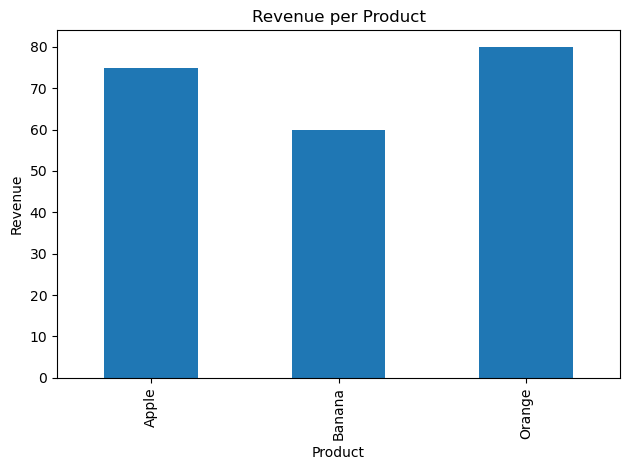

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("sales_data.db")

query = """
SELECT product, 
       SUM(quantity) AS total_qty, 
       SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""

df = pd.read_sql_query(query, conn)

print(df)

# Plot Bar Chart
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Revenue per Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

conn.close()


In [3]:
#Highest Selling Product

top_product = df.sort_values(by='revenue', ascending=False).iloc[0]
print(f"Top Selling Product: {top_product['product']} with Revenue: {top_product['revenue']}")


Top Selling Product: Orange with Revenue: 80.0


In [5]:
#Revenue Percentage Per Product

df['revenue_pct'] = (df['revenue'] / df['revenue'].sum()) * 100
print(df[['product', 'revenue_pct']])


  product  revenue_pct
0   Apple    34.883721
1  Banana    27.906977
2  Orange    37.209302


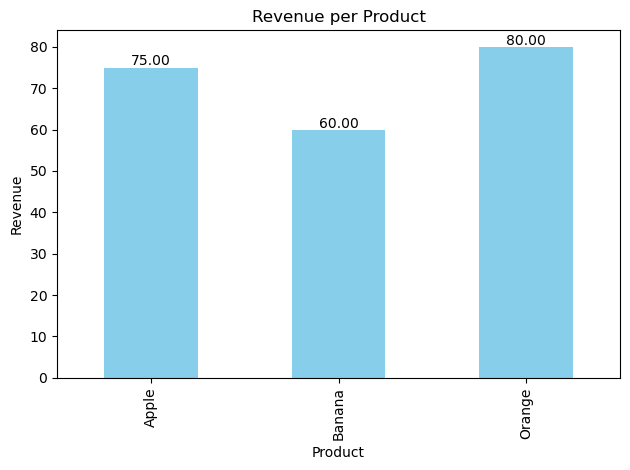

In [7]:
ax = df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue per Product")
plt.xlabel("Product")
plt.ylabel("Revenue")

# Add value labels
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height() + 0.5, f"{i.get_height():.2f}", 
            ha='center', fontsize=10)

plt.tight_layout()
plt.show()


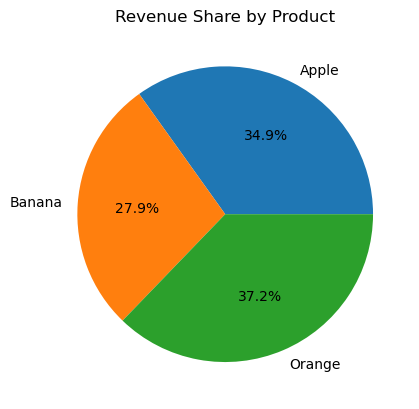

In [8]:
df.plot(kind='pie', y='revenue', labels=df['product'], autopct='%1.1f%%', legend=False)
plt.title("Revenue Share by Product")
plt.ylabel('')
plt.show()
